In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, kruskal
%matplotlib inline

In [2]:
# Import data and sort by deadline date
df = pd.read_csv("data_ess.csv")

# Replace dataframe values with actual values for better visualization
df['year'] = df['year'].map({6: 2012, 7: 2014})
df['gndr'] = df['gndr'].map({1: 'Male', 2: 'Female'})
df['partner'] = df['partner'].map({1: 'Together', 2: 'Alone'})
df['cntry'] = df['cntry'].map({'CH': 'Switzerland',
                                'CZ': 'Czech Republic',
                                'DE': 'Denmark',
                                'ES': 'Spain',
                                'NO': 'Norway',
                                'SE': 'Sweden'})

In [3]:
# Preview the data
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,Switzerland,5,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,Female,60.0,Together
1,Switzerland,25,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,Female,59.0,Together
2,Switzerland,26,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,Male,24.0,Alone
3,Switzerland,28,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,Female,64.0,Together
4,Switzerland,29,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,Female,55.0,Together


1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AB020A988>,
      dtype=object)

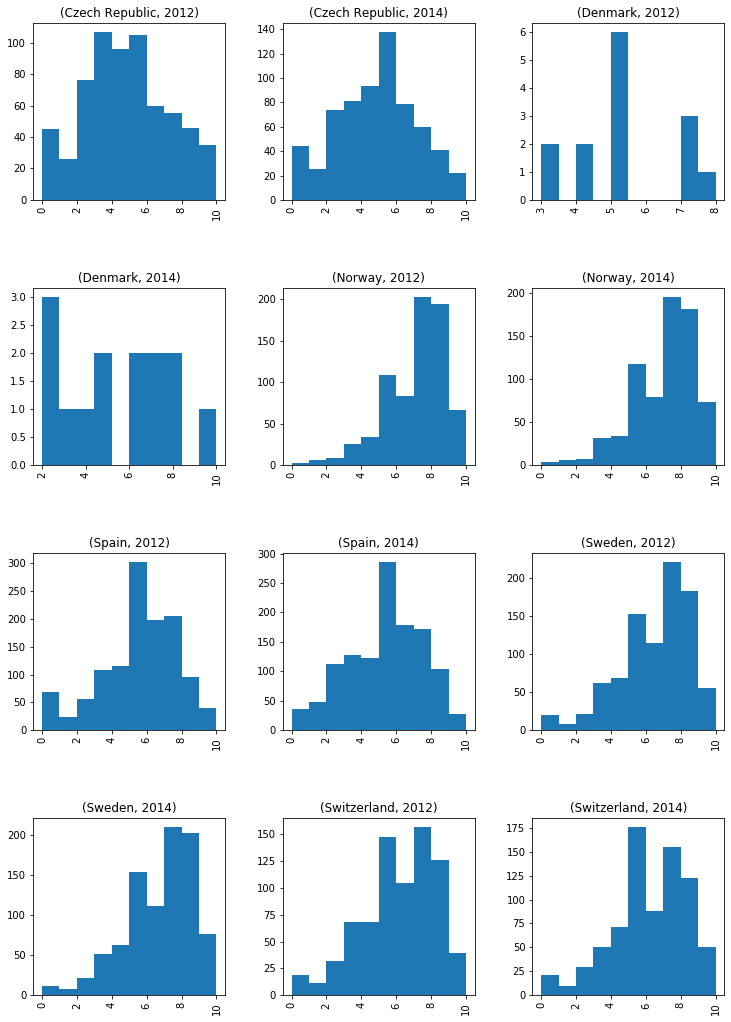

In [4]:
plt.rcParams['figure.figsize'] = [12,18]

df.hist(by=['cntry', 'year'], column='ppltrst')

In [5]:
df2 = df.dropna()

# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=df2['ppltrst'],      
                          groups=df2['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Czech Republic,Denmark,0.8428,0.3003,-0.3146,2.0001,False
Czech Republic,Norway,2.2445,0.001,2.0116,2.4773,True
Czech Republic,Spain,0.6555,0.001,0.4439,0.867,True
Czech Republic,Sweden,1.7625,0.001,1.5393,1.9857,True
Czech Republic,Switzerland,1.346,0.001,1.1151,1.5768,True
Denmark,Norway,1.4017,0.0072,0.2463,2.5572,True
Denmark,Spain,-0.1873,0.9,-1.3386,0.964,False
Denmark,Sweden,0.9197,0.2053,-0.2338,2.0733,False
Denmark,Switzerland,0.5032,0.7917,-0.6518,1.6582,False
Norway,Spain,-1.589,0.001,-1.7899,-1.3882,True


2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AB19F8A08>,
      dtype=object)

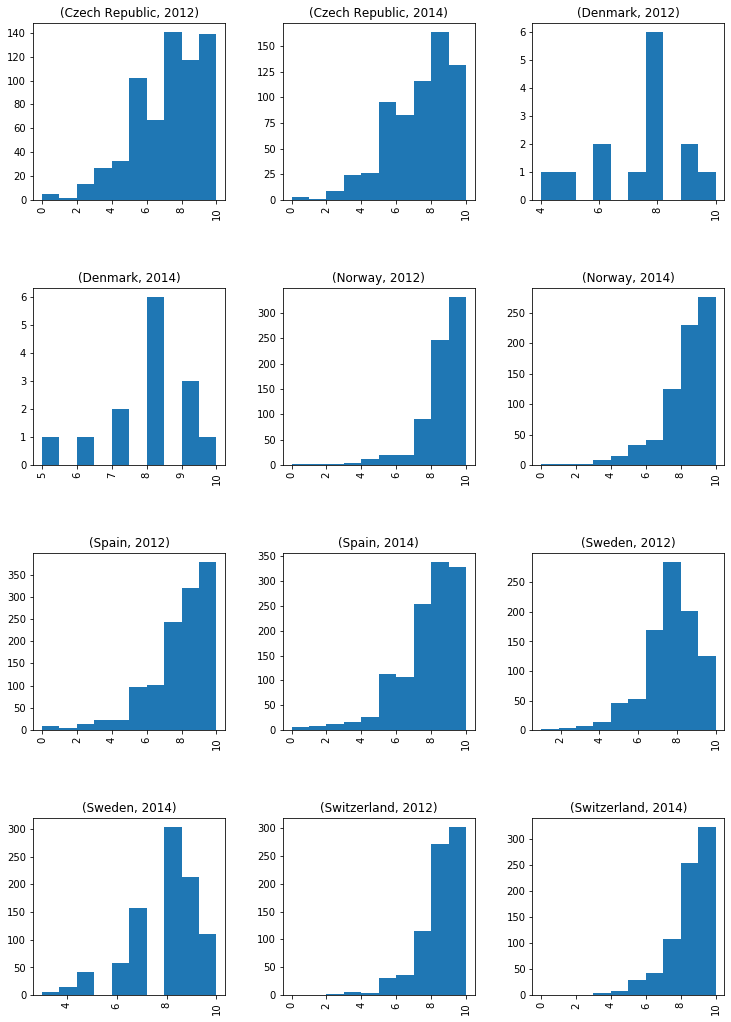

In [6]:
plt.rcParams['figure.figsize'] = [12,18]

df.hist(by=['cntry', 'year'], column='happy')

In [7]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=df2['happy'],      
                          groups=df2['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Czech Republic,Denmark,0.7359,0.2072,-0.1888,1.6607,False
Czech Republic,Norway,1.2292,0.001,1.0432,1.4153,True
Czech Republic,Spain,0.6481,0.001,0.4791,0.8171,True
Czech Republic,Sweden,1.0634,0.001,0.8851,1.2417,True
Czech Republic,Switzerland,1.2566,0.001,1.0721,1.441,True
Denmark,Norway,0.4933,0.6293,-0.4299,1.4166,False
Denmark,Spain,-0.0878,0.9,-1.0077,0.8322,False
Denmark,Sweden,0.3275,0.9,-0.5943,1.2492,False
Denmark,Switzerland,0.5206,0.5803,-0.4023,1.4435,False
Norway,Spain,-0.5811,0.001,-0.7416,-0.4206,True


3. Who reported watching more TV in 2012, men or women?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AB3E42A08>,
      dtype=object)

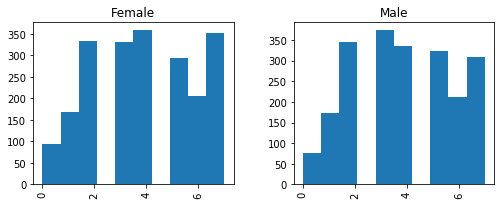

In [24]:
plt.rcParams['figure.figsize'] = [8,3]

df.loc[(df['year']==2012)].hist(by=['gndr'], column='tvtot')


In [9]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=df2['tvtot'],      
                          groups=df2['gndr'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Female,Male,-0.072,0.1058,-0.1593,0.0152,False


In [10]:
# Run t-test in order to see if the two groups are significantly different
ttest_ind((df2.loc[(df2['year']==2012) & (df2['gndr']=='Male')])['tvtot'],
        (df2.loc[(df2['year']==2012) & (df2['gndr']=='Female')])['tvtot'],
         equal_var=False)

Ttest_indResult(statistic=-0.7321850526951791, pvalue=0.46409787829722293)

In [27]:
# Compute average tv time for men and women in 2012
tv_men = (df.loc[(df['year']==2012) & (df['gndr']=='Male')]['tvtot']).mean()
tv_women = (df.loc[(df['year']==2012) & (df['gndr']=='Female')])['tvtot'].mean()

print("Men: {} \nWomen: {}".format(tv_men, tv_women))

Men: 3.901906090190609 
Women: 3.944392523364486


Based on our tests, it would appear as though men and women are statistically different, and women on average, watched tv slightly longer.

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AB3D3A588>,
      dtype=object)

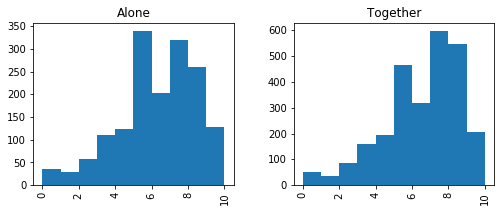

In [23]:
plt.rcParams['figure.figsize'] = [8,3]

df.loc[(df['year']==2012)].hist(by=['partner'], column='pplfair')

In [13]:

# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=df2['pplfair'],      
                          groups=df2['partner'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Alone,Together,0.1484,0.0021,0.0538,0.243,True


In [14]:

# Print Mood's Median test result for both domestic statuses
alone_2012 = (df.loc[(df['year']==2012) & (df['partner']=='Alone')])['pplfair']
together_2012 = (df.loc[(df['year']==2012) & (df['partner']=='Together')])['pplfair']
    
kruskal(alone_2012, together_2012, nan_policy='omit')

KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)

Based on the results of our test, it would appear as though there is no significant difference between the two groups, people that live with a partner and people that live alone.

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AB23D8888>,
      dtype=object)

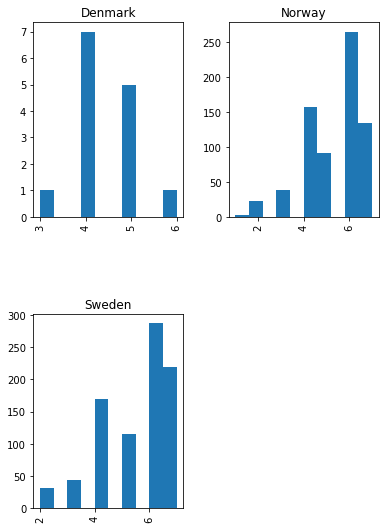

In [15]:
plt.rcParams['figure.figsize'] = [6,9]

# Picking scandinavian countries among all countries
scandinavia = df2.loc[df2['cntry'].isin(['Norway', 'Sweden', 'Denmark'])]

(scandinavia.loc[(scandinavia['year']==2014)]).hist(by=['cntry'], column='sclmeet')

In [16]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=scandinavia['sclmeet'],      
                          groups=scandinavia['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Denmark,Norway,0.77,0.0093,0.1554,1.3846,True
Denmark,Sweden,0.8188,0.005,0.2053,1.4324,True
Norway,Sweden,0.0489,0.5649,-0.0644,0.1622,False


Based on the results of our histogram and tukey test, these distributions are clearly not normal, and since the variables that we want to measure are 3 independent groups, we will be using a Kruskal-Wallace test.

In [17]:
stats.kruskal((scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Denmark')])['sclmeet'],
             (scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Norway')])['sclmeet'],
             (scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Sweden')])['sclmeet']
             )

KruskalResult(statistic=13.770182720957441, pvalue=0.0010229226963801021)

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AB256D588>,
      dtype=object)

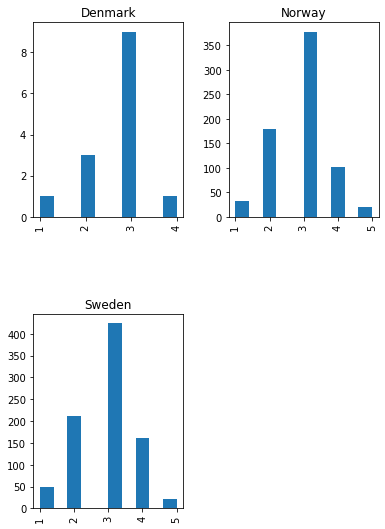

In [18]:
plt.rcParams['figure.figsize'] = [6,9]

(scandinavia.loc[(scandinavia['year']==2014)]).hist(by=['cntry'], column='sclact')


In [19]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=scandinavia['sclact'],      
                          groups=scandinavia['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Denmark,Norway,0.0993,0.796,-0.2838,0.4823,False
Denmark,Sweden,0.0803,0.8619,-0.3021,0.4627,False
Norway,Sweden,-0.019,0.7837,-0.0896,0.0517,False


In [20]:
stats.kruskal((scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Denmark')])['sclact'],
             (scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Norway')])['sclact'],
             (scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Sweden')])['sclact']
             )



KruskalResult(statistic=0.8337838205438339, pvalue=0.6590921571860962)